- https://albertauyeung.github.io/2017/04/23/python-matrix-factorization.html

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import boxcox, inv_boxcox
from scipy import stats

from fastai.tabular.all import *
from fastai.collab import *

from recommenderSystem import RecSys

# <center> Datos Fastai (MovieLens 100K)

In [2]:
path = untar_data(URLs.ML_100k)
df_fastai = pd.read_csv(path/'u.data', delimiter='\t', header=None, usecols=(0,1,2), names=['user','movie','rating'])
df_fastai.head()

,user,movie,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [3]:
movielens = RecSys(df_fastai, userName="user", itemName="movie", scoreName="rating")

Number of users: 943
Number of items: 1682
Number of interactions: 100000


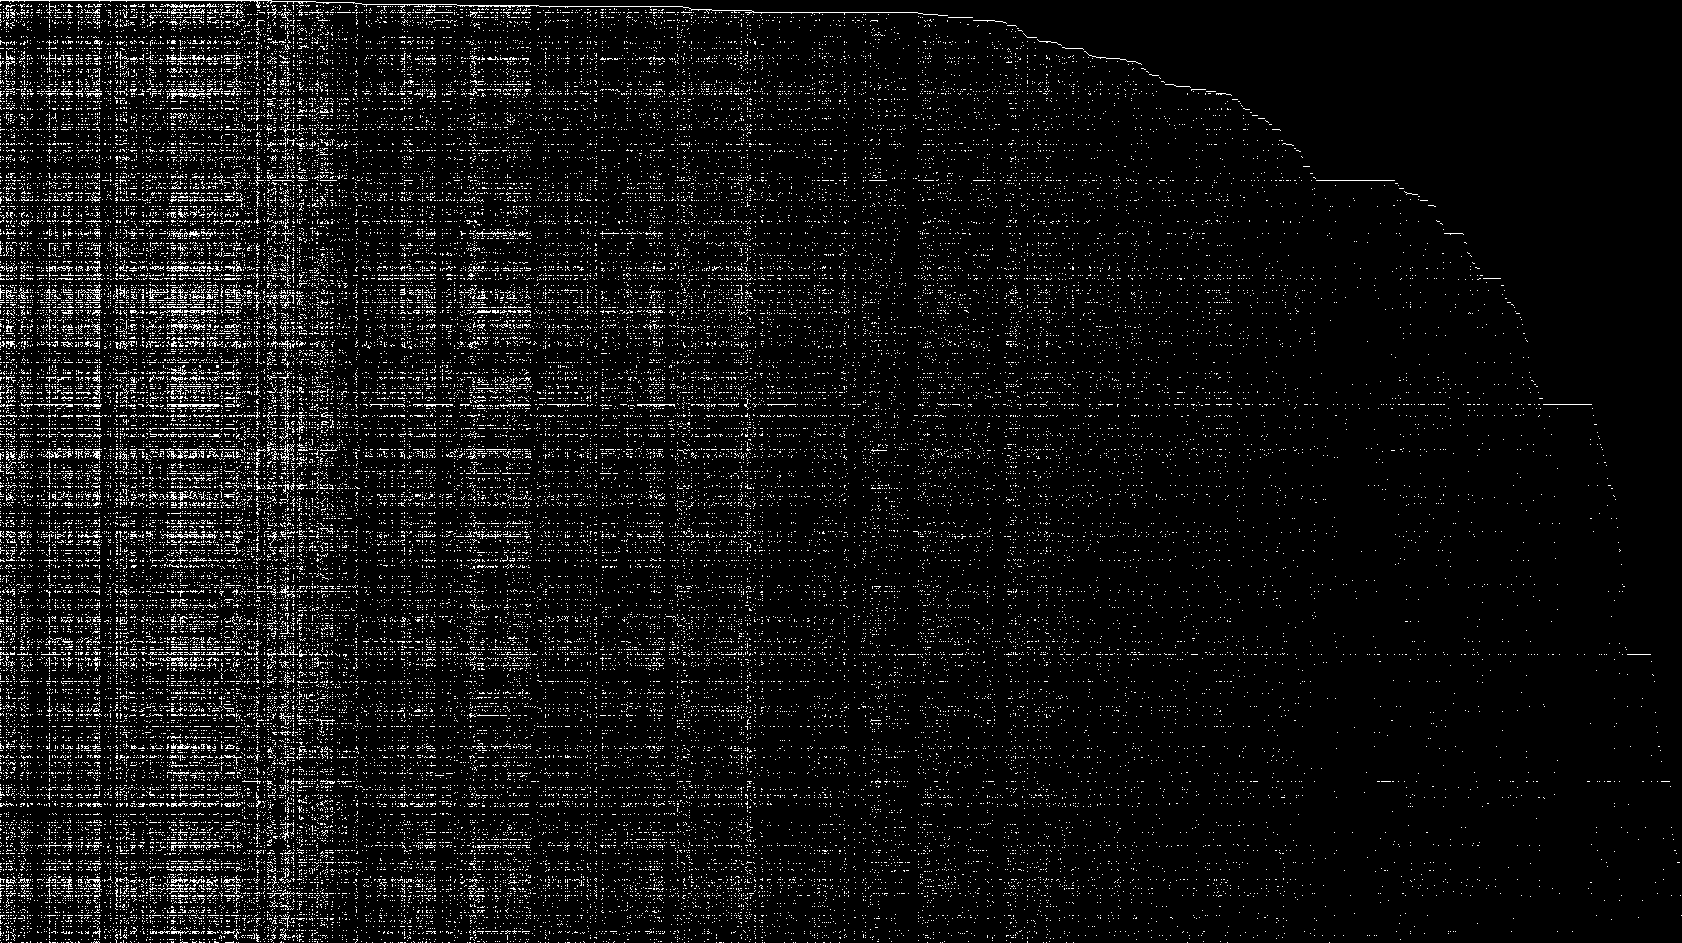

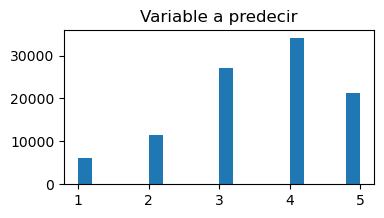

In [4]:
movielens.draw_matrix()

## Train with fast.ai

In [26]:
dls = CollabDataLoaders.from_df(ratings=df_fastai,
                                valid_pct=0.2,
                                user_name="user",
                                item_name="movie",
                                rating_name="rating",
                                seed=None,
                                bs=64)

learn = collab_learner(dls, n_factors=50, y_range=(0, 5.5), metrics=[mae])
learn.fit_one_cycle(5, 0.005, wd=0.1)

epoch,train_loss,valid_loss,mae,time
0,0.947906,0.923960,0.767241,00:04
1,0.859828,0.842740,0.728674,00:04
2,0.752254,0.805307,0.710600,00:04
3,0.612141,0.794304,0.705050,00:04
4,0.510881,0.795004,0.705244,00:04


In [34]:
u = learn.u_weight
u.weight

Parameter containing:
tensor([[-3.8833e-04,  7.8270e-04, -1.1510e-03,  ...,  1.8964e-03,
         -9.1475e-04, -3.5478e-03],
        [-6.0580e-02, -4.7502e-01, -5.6993e-01,  ..., -3.1269e-01,
         -5.9620e-01,  2.6721e-01],
        [-2.3691e-01,  2.1349e-02, -6.0027e-02,  ..., -8.2608e-02,
         -1.0351e-01,  1.1057e-01],
        ...,
        [-1.0473e-01, -2.1451e-01, -8.8705e-02,  ..., -1.5005e-01,
         -1.5157e-01,  1.8251e-01],
        [ 1.2802e-01,  2.9816e-01, -5.0453e-03,  ..., -5.9165e-02,
          4.5552e-02,  1.0486e-01],
        [-2.9254e-01,  2.1802e-02,  1.9132e-02,  ..., -1.0776e-01,
         -9.2477e-02,  2.2114e-01]], device='cuda:0', requires_grad=True)

## Train with my module

In [6]:
split_idx = int(len(movielens.samples) * 0.8)
#np.random.shuffle(self.samples)
train_samples = movielens.samples[:split_idx]
valid_samples = movielens.samples[split_idx:]

train_log = movielens.entrenar_modelo_manualmente(
    train_samples = train_samples,
    valid_samples = valid_samples,
    embSize = 50,
    lr = 0.01,
    wd = 0.1,
    epochs=50)

Epoch: 1 ; trMAE = 0.7749 trMSE = 0.9391 valMAE = 0.7896 valMSE = 0.9675
Epoch: 2 ; trMAE = 0.7534 trMSE = 0.8962 valMAE = 0.7687 valMSE = 0.9269
Epoch: 3 ; trMAE = 0.7446 trMSE = 0.8775 valMAE = 0.7603 valMSE = 0.9093
Epoch: 4 ; trMAE = 0.7394 trMSE = 0.8668 valMAE = 0.7555 valMSE = 0.8992
Epoch: 5 ; trMAE = 0.7363 trMSE = 0.8607 valMAE = 0.7531 valMSE = 0.8944
Epoch: 6 ; trMAE = 0.7338 trMSE = 0.8554 valMAE = 0.7509 valMSE = 0.8888
Epoch: 7 ; trMAE = 0.7318 trMSE = 0.8521 valMAE = 0.7490 valMSE = 0.8860
Epoch: 8 ; trMAE = 0.7313 trMSE = 0.8499 valMAE = 0.7487 valMSE = 0.8854
Epoch: 9 ; trMAE = 0.7303 trMSE = 0.8480 valMAE = 0.7482 valMSE = 0.8833
Epoch: 10 ; trMAE = 0.7293 trMSE = 0.8458 valMAE = 0.7475 valMSE = 0.8819
Epoch: 11 ; trMAE = 0.7278 trMSE = 0.8435 valMAE = 0.7469 valMSE = 0.8806
Epoch: 12 ; trMAE = 0.7268 trMSE = 0.8417 valMAE = 0.7467 valMSE = 0.8803
Epoch: 13 ; trMAE = 0.7269 trMSE = 0.8404 valMAE = 0.7470 valMSE = 0.8805
Epoch: 14 ; trMAE = 0.7252 trMSE = 0.8381 valMA

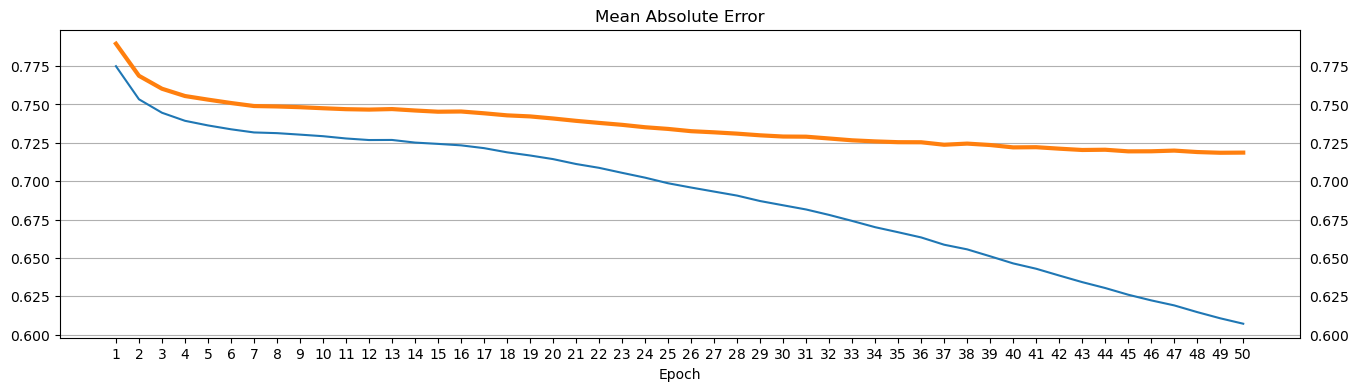

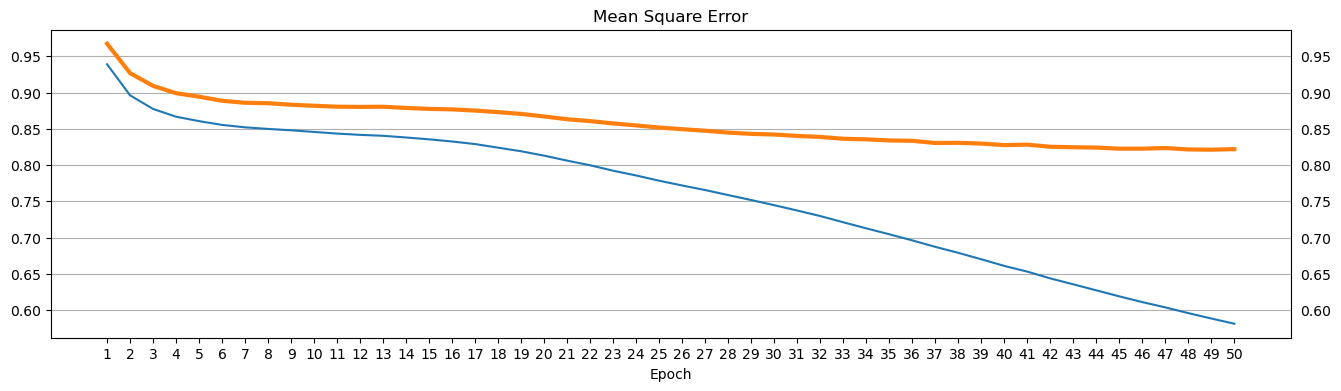

In [7]:
movielens.plot_training(train_log)

In [10]:
movielens.entrenar_modelo_automaticamente(num_de_pruebas=20)

[I 2022-10-13 18:34:33,258] A new study created in memory with name: no-name-9f47c7c5-059c-40d5-b7ed-5fe7e8b68069


Epoch: 1 ; trMAE = 0.9515 trMSE = 1.3580 valMAE = 0.9517 valMSE = 1.3579
Epoch: 2 ; trMAE = 0.9510 trMSE = 1.3565 valMAE = 0.9512 valMSE = 1.3565
Epoch: 3 ; trMAE = 0.9504 trMSE = 1.3550 valMAE = 0.9507 valMSE = 1.3551
Epoch: 4 ; trMAE = 0.9499 trMSE = 1.3535 valMAE = 0.9502 valMSE = 1.3537
Epoch: 5 ; trMAE = 0.9494 trMSE = 1.3520 valMAE = 0.9497 valMSE = 1.3524
Epoch: 6 ; trMAE = 0.9489 trMSE = 1.3505 valMAE = 0.9493 valMSE = 1.3510


[I 2022-10-13 18:34:46,503] Trial 0 finished with value: 1.3496592044830322 and parameters: {'embSize': 11, 'lr': 1.0322586150107193e-05, 'wd': 0.5880217946265422, 'epochs': 7}. Best is trial 0 with value: 1.3496592044830322.


Epoch: 7 ; trMAE = 0.9483 trMSE = 1.3490 valMAE = 0.9488 valMSE = 1.3497


/tmp/ipykernel_123505/258360614.py:345: RuntimeWarning: overflow encountered in multiply
  self.user_embs[user, :] += lr * (err * self.item_embs[item, :] - wd * self.user_embs[user,:])
/tmp/ipykernel_123505/258360614.py:346: RuntimeWarning: overflow encountered in multiply
  self.item_embs[item, :] += lr * (err * self.user_embs[user, :] - wd * self.item_embs[item,:])


Epoch: 1 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan


/tmp/ipykernel_123505/258360614.py:445: RuntimeWarning: invalid value encountered in divide
  return emb_matrix / norms[:,np.newaxis]


Epoch: 2 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 3 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 4 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 5 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 6 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 7 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 8 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 9 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 10 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 11 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 12 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan


[W 2022-10-13 18:35:11,453] Trial 1 failed because of the following error: The value nan is not acceptable.


Epoch: 13 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 1 ; trMAE = 0.9443 trMSE = 1.3010 valMAE = 0.9434 valMSE = 1.2969
Epoch: 2 ; trMAE = 0.9437 trMSE = 1.2994 valMAE = 0.9428 valMSE = 1.2954
Epoch: 3 ; trMAE = 0.9431 trMSE = 1.2978 valMAE = 0.9423 valMSE = 1.2940
Epoch: 4 ; trMAE = 0.9426 trMSE = 1.2962 valMAE = 0.9418 valMSE = 1.2925
Epoch: 5 ; trMAE = 0.9420 trMSE = 1.2946 valMAE = 0.9413 valMSE = 1.2911
Epoch: 6 ; trMAE = 0.9414 trMSE = 1.2931 valMAE = 0.9407 valMSE = 1.2896
Epoch: 7 ; trMAE = 0.9408 trMSE = 1.2915 valMAE = 0.9402 valMSE = 1.2882
Epoch: 8 ; trMAE = 0.9402 trMSE = 1.2900 valMAE = 0.9397 valMSE = 1.2868
Epoch: 9 ; trMAE = 0.9397 trMSE = 1.2884 valMAE = 0.9392 valMSE = 1.2854
Epoch: 10 ; trMAE = 0.9391 trMSE = 1.2869 valMAE = 0.9387 valMSE = 1.2840
Epoch: 11 ; trMAE = 0.9385 trMSE = 1.2854 valMAE = 0.9382 valMSE = 1.2826
Epoch: 12 ; trMAE = 0.9380 trMSE = 1.2839 valMAE = 0.9376 valMSE = 1.2812
Epoch: 13 ; trMAE = 0.9374 trMSE = 1.2824 valMAE = 0.9371 v

[I 2022-10-13 18:35:48,110] Trial 2 finished with value: 1.2718695402145386 and parameters: {'embSize': 28, 'lr': 1.0940285271916516e-05, 'wd': 3.744487715109979e-05, 'epochs': 19}. Best is trial 2 with value: 1.2718695402145386.
/tmp/ipykernel_123505/258360614.py:346: RuntimeWarning: invalid value encountered in subtract
  self.item_embs[item, :] += lr * (err * self.user_embs[user, :] - wd * self.item_embs[item,:])


Epoch: 1 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan


/tmp/ipykernel_123505/258360614.py:442: RuntimeWarning: overflow encountered in square
  norms = np.sqrt( np.sum( emb_matrix**2, axis=1) )


Epoch: 2 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 3 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 4 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 5 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 6 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 7 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 8 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 9 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 10 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 11 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 12 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 13 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 14 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 15 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 16 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 17 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 18 ; trMA

[W 2022-10-13 18:36:34,250] Trial 3 failed because of the following error: The value nan is not acceptable.


Epoch: 1 ; trMAE = 0.9388 trMSE = 1.2846 valMAE = 0.9429 valMSE = 1.2921
Epoch: 2 ; trMAE = 0.9339 trMSE = 1.2715 valMAE = 0.9384 valMSE = 1.2802
Epoch: 3 ; trMAE = 0.9291 trMSE = 1.2592 valMAE = 0.9341 valMSE = 1.2689
Epoch: 4 ; trMAE = 0.9244 trMSE = 1.2475 valMAE = 0.9298 valMSE = 1.2583
Epoch: 5 ; trMAE = 0.9199 trMSE = 1.2364 valMAE = 0.9257 valMSE = 1.2482
Epoch: 6 ; trMAE = 0.9155 trMSE = 1.2258 valMAE = 0.9218 valMSE = 1.2387
Epoch: 7 ; trMAE = 0.9112 trMSE = 1.2157 valMAE = 0.9180 valMSE = 1.2296
Epoch: 8 ; trMAE = 0.9071 trMSE = 1.2062 valMAE = 0.9142 valMSE = 1.2211
Epoch: 9 ; trMAE = 0.9031 trMSE = 1.1970 valMAE = 0.9107 valMSE = 1.2129
Epoch: 10 ; trMAE = 0.8993 trMSE = 1.1883 valMAE = 0.9072 valMSE = 1.2052
Epoch: 11 ; trMAE = 0.8955 trMSE = 1.1800 valMAE = 0.9039 valMSE = 1.1978
Epoch: 12 ; trMAE = 0.8919 trMSE = 1.1720 valMAE = 0.9007 valMSE = 1.1908
Epoch: 13 ; trMAE = 0.8883 trMSE = 1.1644 valMAE = 0.8975 valMSE = 1.1841
Epoch: 14 ; trMAE = 0.8849 trMSE = 1.1571 valMA

[I 2022-10-13 18:37:14,392] Trial 4 finished with value: 1.1400066614151 and parameters: {'embSize': 30, 'lr': 9.585104702080882e-05, 'wd': 0.005242380181066536, 'epochs': 21}. Best is trial 4 with value: 1.1400066614151.


Epoch: 21 ; trMAE = 0.8635 trMSE = 1.1136 valMAE = 0.8758 valMSE = 1.1400
Epoch: 1 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 2 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 3 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 4 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 5 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 6 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 7 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan


[W 2022-10-13 18:37:29,833] Trial 5 failed because of the following error: The value nan is not acceptable.


Epoch: 8 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 1 ; trMAE = 0.8813 trMSE = 1.1586 valMAE = 0.8856 valMSE = 1.1662
Epoch: 2 ; trMAE = 0.8423 trMSE = 1.0793 valMAE = 0.8519 valMSE = 1.0994
Epoch: 3 ; trMAE = 0.8175 trMSE = 1.0304 valMAE = 0.8314 valMSE = 1.0607
Epoch: 4 ; trMAE = 0.8004 trMSE = 0.9966 valMAE = 0.8181 valMSE = 1.0355
Epoch: 5 ; trMAE = 0.7878 trMSE = 0.9711 valMAE = 0.8089 valMSE = 1.0178
Epoch: 6 ; trMAE = 0.7779 trMSE = 0.9509 valMAE = 0.8022 valMSE = 1.0048
Epoch: 7 ; trMAE = 0.7699 trMSE = 0.9340 valMAE = 0.7971 valMSE = 0.9948


[I 2022-10-13 18:37:45,256] Trial 6 finished with value: 0.9868143796920776 and parameters: {'embSize': 21, 'lr': 0.0015075575967228277, 'wd': 0.0037367986834400966, 'epochs': 8}. Best is trial 6 with value: 0.9868143796920776.


Epoch: 8 ; trMAE = 0.7630 trMSE = 0.9196 valMAE = 0.7931 valMSE = 0.9868
Epoch: 1 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 2 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 3 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 4 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 5 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan


[W 2022-10-13 18:37:56,821] Trial 7 failed because of the following error: The value nan is not acceptable.


Epoch: 6 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 1 ; trMAE = 0.9421 trMSE = 1.3146 valMAE = 0.9459 valMSE = 1.3214
Epoch: 2 ; trMAE = 0.9380 trMSE = 1.3036 valMAE = 0.9423 valMSE = 1.3114
Epoch: 3 ; trMAE = 0.9340 trMSE = 1.2931 valMAE = 0.9387 valMSE = 1.3018
Epoch: 4 ; trMAE = 0.9302 trMSE = 1.2830 valMAE = 0.9353 valMSE = 1.2927
Epoch: 5 ; trMAE = 0.9265 trMSE = 1.2734 valMAE = 0.9319 valMSE = 1.2840
Epoch: 6 ; trMAE = 0.9228 trMSE = 1.2641 valMAE = 0.9287 valMSE = 1.2756
Epoch: 7 ; trMAE = 0.9193 trMSE = 1.2553 valMAE = 0.9255 valMSE = 1.2677
Epoch: 8 ; trMAE = 0.9159 trMSE = 1.2468 valMAE = 0.9224 valMSE = 1.2601


[I 2022-10-13 18:38:14,183] Trial 8 finished with value: 1.2527574300765991 and parameters: {'embSize': 17, 'lr': 7.88620444154647e-05, 'wd': 1.7119735552505057e-05, 'epochs': 9}. Best is trial 6 with value: 0.9868143796920776.


Epoch: 9 ; trMAE = 0.9125 trMSE = 1.2386 valMAE = 0.9194 valMSE = 1.2528
Epoch: 1 ; trMAE = 0.6791 trMSE = 0.7345 valMAE = 0.7707 valMSE = 0.9399
Epoch: 2 ; trMAE = 0.5839 trMSE = 0.5482 valMAE = 0.7702 valMSE = 0.9470
Epoch: 3 ; trMAE = 0.5229 trMSE = 0.4393 valMAE = 0.7649 valMSE = 0.9375
Epoch: 4 ; trMAE = 0.4837 trMSE = 0.3779 valMAE = 0.7608 valMSE = 0.9294
Epoch: 5 ; trMAE = 0.4589 trMSE = 0.3413 valMAE = 0.7580 valMSE = 0.9264
Epoch: 6 ; trMAE = 0.4404 trMSE = 0.3165 valMAE = 0.7555 valMSE = 0.9197
Epoch: 7 ; trMAE = 0.4269 trMSE = 0.2981 valMAE = 0.7530 valMSE = 0.9145
Epoch: 8 ; trMAE = 0.4171 trMSE = 0.2858 valMAE = 0.7542 valMSE = 0.9145
Epoch: 9 ; trMAE = 0.4094 trMSE = 0.2756 valMAE = 0.7514 valMSE = 0.9089
Epoch: 10 ; trMAE = 0.4042 trMSE = 0.2682 valMAE = 0.7519 valMSE = 0.9099
Epoch: 11 ; trMAE = 0.3981 trMSE = 0.2615 valMAE = 0.7490 valMSE = 0.9037
Epoch: 12 ; trMAE = 0.3932 trMSE = 0.2559 valMAE = 0.7489 valMSE = 0.9031


[I 2022-10-13 18:38:38,827] Trial 9 finished with value: 0.9050807952880859 and parameters: {'embSize': 49, 'lr': 0.042623884716037515, 'wd': 0.0004187746732518168, 'epochs': 13}. Best is trial 9 with value: 0.9050807952880859.


Epoch: 13 ; trMAE = 0.3896 trMSE = 0.2519 valMAE = 0.7481 valMSE = 0.9051
Epoch: 1 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 2 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 3 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 4 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 5 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 6 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 7 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 8 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 9 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 10 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan


[W 2022-10-13 18:39:00,281] Trial 10 failed because of the following error: The value nan is not acceptable.


Epoch: 11 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 1 ; trMAE = 0.7948 trMSE = 0.9815 valMAE = 0.8177 valMSE = 1.0307
Epoch: 2 ; trMAE = 0.7572 trMSE = 0.9062 valMAE = 0.7918 valMSE = 0.9829
Epoch: 3 ; trMAE = 0.7370 trMSE = 0.8631 valMAE = 0.7814 valMSE = 0.9628
Epoch: 4 ; trMAE = 0.7226 trMSE = 0.8313 valMAE = 0.7765 valMSE = 0.9523
Epoch: 5 ; trMAE = 0.7105 trMSE = 0.8055 valMAE = 0.7732 valMSE = 0.9449
Epoch: 6 ; trMAE = 0.7003 trMSE = 0.7835 valMAE = 0.7707 valMSE = 0.9400
Epoch: 7 ; trMAE = 0.6914 trMSE = 0.7642 valMAE = 0.7691 valMSE = 0.9369
Epoch: 8 ; trMAE = 0.6834 trMSE = 0.7471 valMAE = 0.7676 valMSE = 0.9338
Epoch: 9 ; trMAE = 0.6760 trMSE = 0.7316 valMAE = 0.7664 valMSE = 0.9314
Epoch: 10 ; trMAE = 0.6693 trMSE = 0.7175 valMAE = 0.7648 valMSE = 0.9280
Epoch: 11 ; trMAE = 0.6632 trMSE = 0.7046 valMAE = 0.7641 valMSE = 0.9259
Epoch: 12 ; trMAE = 0.6571 trMSE = 0.6926 valMAE = 0.7628 valMSE = 0.9236
Epoch: 13 ; trMAE = 0.6515 trMSE = 0.6817 valMAE = 0.7616 v

[I 2022-10-13 18:39:36,632] Trial 11 finished with value: 0.9052242040634155 and parameters: {'embSize': 28, 'lr': 0.0059852336688015935, 'wd': 9.53420658728256e-05, 'epochs': 19}. Best is trial 9 with value: 0.9050807952880859.


Epoch: 19 ; trMAE = 0.6257 trMSE = 0.6294 valMAE = 0.7550 valMSE = 0.9052
Epoch: 1 ; trMAE = 0.9424 trMSE = 1.2822 valMAE = 0.9436 valMSE = 1.2830
Epoch: 2 ; trMAE = 0.9403 trMSE = 1.2765 valMAE = 0.9417 valMSE = 1.2778
Epoch: 3 ; trMAE = 0.9382 trMSE = 1.2709 valMAE = 0.9398 valMSE = 1.2727
Epoch: 4 ; trMAE = 0.9362 trMSE = 1.2655 valMAE = 0.9379 valMSE = 1.2677
Epoch: 5 ; trMAE = 0.9341 trMSE = 1.2601 valMAE = 0.9361 valMSE = 1.2629
Epoch: 6 ; trMAE = 0.9321 trMSE = 1.2549 valMAE = 0.9343 valMSE = 1.2581
Epoch: 7 ; trMAE = 0.9301 trMSE = 1.2498 valMAE = 0.9324 valMSE = 1.2535
Epoch: 8 ; trMAE = 0.9281 trMSE = 1.2449 valMAE = 0.9307 valMSE = 1.2490
Epoch: 9 ; trMAE = 0.9262 trMSE = 1.2400 valMAE = 0.9289 valMSE = 1.2446
Epoch: 10 ; trMAE = 0.9242 trMSE = 1.2352 valMAE = 0.9272 valMSE = 1.2403
Epoch: 11 ; trMAE = 0.9223 trMSE = 1.2305 valMAE = 0.9254 valMSE = 1.2360
Epoch: 12 ; trMAE = 0.9204 trMSE = 1.2260 valMAE = 0.9237 valMSE = 1.2319
Epoch: 13 ; trMAE = 0.9186 trMSE = 1.2215 valMA

[I 2022-10-13 18:40:11,346] Trial 12 finished with value: 1.2090188264846802 and parameters: {'embSize': 47, 'lr': 3.98160442797139e-05, 'wd': 0.00019746556198013812, 'epochs': 18}. Best is trial 9 with value: 0.9050807952880859.


Epoch: 18 ; trMAE = 0.9096 trMSE = 1.2004 valMAE = 0.9140 valMSE = 1.2090
Epoch: 1 ; trMAE = 0.9429 trMSE = 1.2855 valMAE = 0.9461 valMSE = 1.2898
Epoch: 2 ; trMAE = 0.9415 trMSE = 1.2818 valMAE = 0.9449 valMSE = 1.2864
Epoch: 3 ; trMAE = 0.9402 trMSE = 1.2781 valMAE = 0.9436 valMSE = 1.2830
Epoch: 4 ; trMAE = 0.9388 trMSE = 1.2744 valMAE = 0.9424 valMSE = 1.2797
Epoch: 5 ; trMAE = 0.9375 trMSE = 1.2708 valMAE = 0.9412 valMSE = 1.2764
Epoch: 6 ; trMAE = 0.9361 trMSE = 1.2673 valMAE = 0.9400 valMSE = 1.2732
Epoch: 7 ; trMAE = 0.9348 trMSE = 1.2639 valMAE = 0.9388 valMSE = 1.2701
Epoch: 8 ; trMAE = 0.9335 trMSE = 1.2605 valMAE = 0.9376 valMSE = 1.2670


[I 2022-10-13 18:40:28,833] Trial 13 finished with value: 1.26392662525177 and parameters: {'embSize': 47, 'lr': 2.586503861088085e-05, 'wd': 0.24515677374135475, 'epochs': 9}. Best is trial 9 with value: 0.9050807952880859.


Epoch: 9 ; trMAE = 0.9322 trMSE = 1.2571 valMAE = 0.9364 valMSE = 1.2639
Epoch: 1 ; trMAE = 0.9155 trMSE = 1.2352 valMAE = 0.9213 valMSE = 1.2457
Epoch: 2 ; trMAE = 0.8924 trMSE = 1.1819 valMAE = 0.9008 valMSE = 1.1980
Epoch: 3 ; trMAE = 0.8733 trMSE = 1.1413 valMAE = 0.8842 valMSE = 1.1625
Epoch: 4 ; trMAE = 0.8576 trMSE = 1.1092 valMAE = 0.8706 valMSE = 1.1350
Epoch: 5 ; trMAE = 0.8446 trMSE = 1.0833 valMAE = 0.8594 valMSE = 1.1131
Epoch: 6 ; trMAE = 0.8337 trMSE = 1.0617 valMAE = 0.8502 valMSE = 1.0954
Epoch: 7 ; trMAE = 0.8244 trMSE = 1.0434 valMAE = 0.8425 valMSE = 1.0807
Epoch: 8 ; trMAE = 0.8165 trMSE = 1.0277 valMAE = 0.8360 valMSE = 1.0683
Epoch: 9 ; trMAE = 0.8096 trMSE = 1.0139 valMAE = 0.8305 valMSE = 1.0578
Epoch: 10 ; trMAE = 0.8036 trMSE = 1.0017 valMAE = 0.8257 valMSE = 1.0486
Epoch: 11 ; trMAE = 0.7982 trMSE = 0.9908 valMAE = 0.8215 valMSE = 1.0407
Epoch: 12 ; trMAE = 0.7934 trMSE = 0.9810 valMAE = 0.8179 valMSE = 1.0337
Epoch: 13 ; trMAE = 0.7890 trMSE = 0.9720 valMAE

[I 2022-10-13 18:41:14,527] Trial 14 finished with value: 0.987730860710144 and parameters: {'embSize': 22, 'lr': 0.0005802270033167336, 'wd': 0.07636389521096872, 'epochs': 24}. Best is trial 9 with value: 0.9050807952880859.


Epoch: 24 ; trMAE = 0.7578 trMSE = 0.9056 valMAE = 0.7943 valMSE = 0.9877
Epoch: 1 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 2 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 3 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 4 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 5 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 6 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 7 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 8 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 9 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 10 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 11 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 12 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan


[W 2022-10-13 18:41:39,683] Trial 15 failed because of the following error: The value nan is not acceptable.


Epoch: 13 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 1 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 2 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 3 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 4 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 5 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 6 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 7 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 8 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 9 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 10 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 11 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 12 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan


[W 2022-10-13 18:42:04,153] Trial 16 failed because of the following error: The value nan is not acceptable.


Epoch: 13 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 1 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 2 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 3 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 4 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 5 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 6 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 7 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 8 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 9 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 10 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 11 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 12 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan


[W 2022-10-13 18:42:29,288] Trial 17 failed because of the following error: The value nan is not acceptable.


Epoch: 13 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 1 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 2 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 3 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 4 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 5 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 6 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 7 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 8 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 9 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 10 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 11 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 12 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan


[W 2022-10-13 18:42:54,332] Trial 18 failed because of the following error: The value nan is not acceptable.


Epoch: 13 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 1 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 2 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 3 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 4 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 5 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 6 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 7 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 8 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 9 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 10 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 11 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 12 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan


[W 2022-10-13 18:43:19,351] Trial 19 failed because of the following error: The value nan is not acceptable.


Epoch: 13 ; trMAE = nan trMSE = nan valMAE = nan valMSE = nan
Epoch: 1 ; trMAE = 0.6744 trMSE = 0.7299
Epoch: 2 ; trMAE = 0.5793 trMSE = 0.5416
Epoch: 3 ; trMAE = 0.5239 trMSE = 0.4430
Epoch: 4 ; trMAE = 0.4882 trMSE = 0.3844
Epoch: 5 ; trMAE = 0.4662 trMSE = 0.3522
Epoch: 6 ; trMAE = 0.4493 trMSE = 0.3288
Epoch: 7 ; trMAE = 0.4371 trMSE = 0.3121
Epoch: 8 ; trMAE = 0.4281 trMSE = 0.3002
Epoch: 9 ; trMAE = 0.4209 trMSE = 0.2918
Epoch: 10 ; trMAE = 0.4159 trMSE = 0.2847
Epoch: 11 ; trMAE = 0.4123 trMSE = 0.2802
Epoch: 12 ; trMAE = 0.4071 trMSE = 0.2734
Epoch: 13 ; trMAE = 0.4050 trMSE = 0.2697
